In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
from compare_results import compare_accuracy_classes, compare_fairness_classes, compute_average_fairness, compute_average_acc, get_results_epochs, plot_results, plot_accuracy_result, eval_epoch, plot_results_multiple_runs, plot_log_cla_adv

In [91]:
MAX_EPOCH = 5
STEP = 1

#### Load Data

In [108]:
from dataset import AdultDataset 
data_path = "../datasets/adult/"
dataset = AdultDataset(data_path)
train_set, val_set, dict_labels, weights = dataset.load_data()

In [109]:
model_dir= '../models/adult/'

In [111]:
CHANS = dataset.chans
OUT = dataset.n_output

## Compare Results Last Epoch

In [7]:
eval_dir = 'eval'

experiments = ['FairGAN-cla-adv-EXP-1.1/0', 'FairGAN-cla-adv-EXP-1.1/1', 'FairGAN-cla-adv-EXP-1.1/2']
paths = [os.path.join(model_dir, e, eval_dir) for e in experiments]

In [8]:
compute_average_acc(paths).head(10)

,Model,Acc,Acc Pos,Acc Neg
0,FairGAN-cla-adv-EXP-1.10,75.759906,15.190296,95.298821
1,FairGAN-cla-adv-EXP-1.11,75.562418,0.000000,99.986017
2,FairGAN-cla-adv-EXP-1.12,75.572616,0.000000,100.000000


In [9]:
compute_average_fairness(paths).head(10)

,Model,Statistical Parity,Equality Opportunity,Equality Odds
0,FairGAN-cla-adv-EXP-1.10,0.067512,0.176382,0.759138
1,FairGAN-cla-adv-EXP-1.11,0.000182,0.989899,0.779795
2,FairGAN-cla-adv-EXP-1.12,0.000000,0.989899,0.779839


## Eval Epoch

In [21]:
epoch = 1
results_paths = eval_epoch(model_dir, CHANS, OUT, experiments, epoch, val_set, dict_labels)

In [19]:
compute_average_acc(results_paths).head()

,Model,Acc,Acc Pos,Acc Neg
0,FairGAN-cla-adv-EXP-1.10,75.759906,15.190296,95.298821
1,FairGAN-cla-adv-EXP-1.11,75.562418,0.000000,99.986017
2,FairGAN-cla-adv-EXP-1.12,75.572616,0.000000,100.000000


In [20]:
compute_average_fairness(results_paths).head()

,Model,Statistical Parity,Equality Opportunity,Equality Odds
0,FairGAN-cla-adv-EXP-1.10,0.067512,0.176382,0.759138
1,FairGAN-cla-adv-EXP-1.11,0.000182,0.989899,0.779795
2,FairGAN-cla-adv-EXP-1.12,0.000000,0.989899,0.779839


## Eval over multiple epochs

In [94]:
results_acc_temp, results_fair_temp = get_results_epochs(model_dir, CHANS, OUT, experiments, val_set, dict_labels, max_epoch=MAX_EPOCH+1, step=STEP)

# Plot Results Epochs

In [95]:
epochs = list(range(0, MAX_EPOCH+1, STEP))

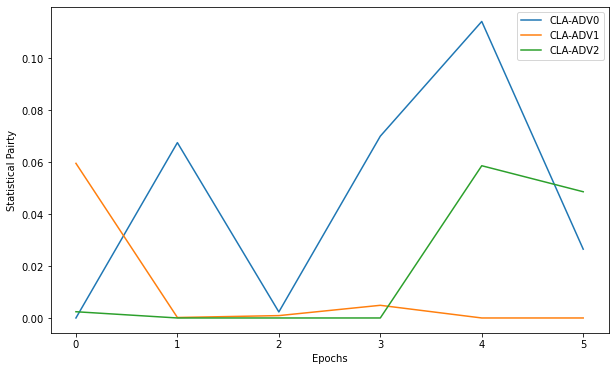

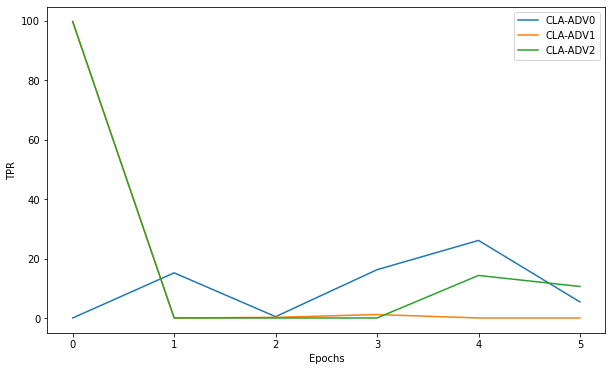

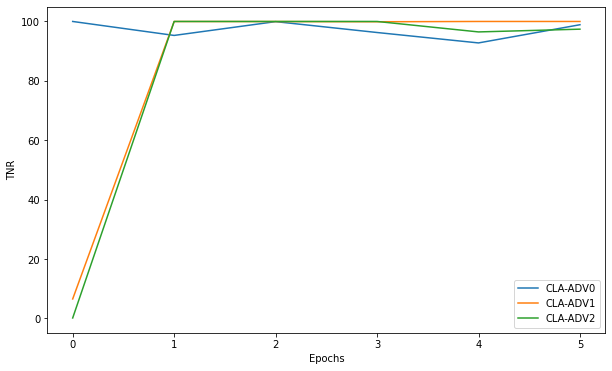

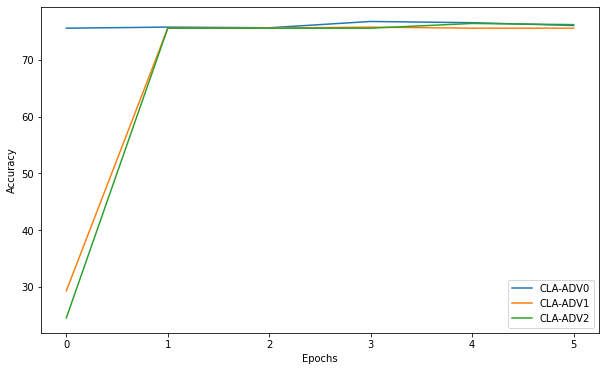

In [96]:
experiments = ['FairGAN-cla-adv-EXP-1.1/0', 'FairGAN-cla-adv-EXP-1.1/1', 'FairGAN-cla-adv-EXP-1.1/2']
labels = ['CLA-ADV0', 'CLA-ADV1', 'CLA-ADV2']

results_acc_cla_adv, results_fair_cla_adv = get_results_epochs(model_dir, CHANS, OUT, experiments, val_set, dict_labels, max_epoch=MAX_EPOCH+1, step=STEP)
plot_results(results_fair_cla_adv, 'Statistical Parity', epochs, experiments, labels, 'Statistical Pairty')
plot_results(results_acc_cla_adv, 'Acc Pos', epochs, experiments ,labels, 'TPR')
plot_results(results_acc_cla_adv, 'Acc Neg', epochs, experiments ,labels, 'TNR')
plot_results(results_acc_cla_adv, 'Acc', epochs, experiments ,labels, 'Accuracy')

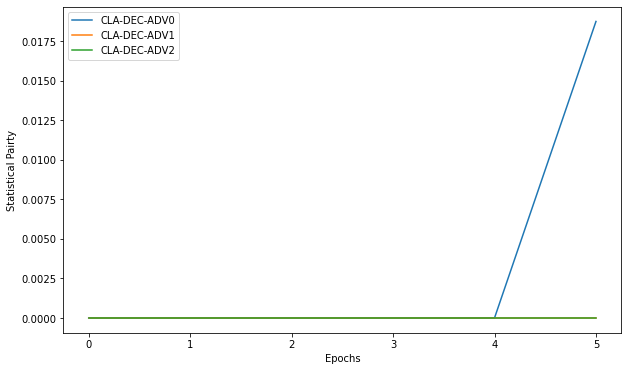

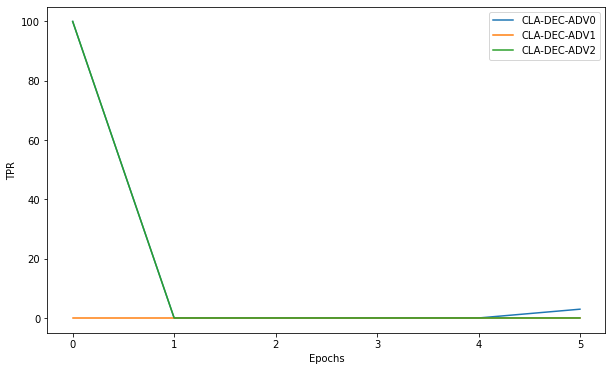

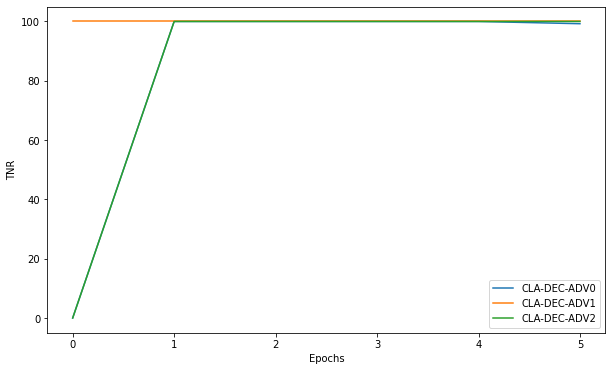

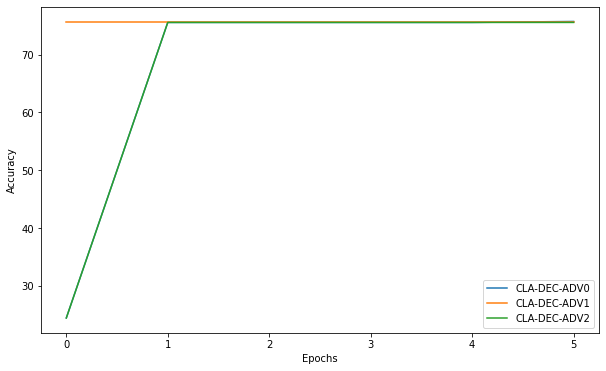

In [100]:
experiments = ['FairGAN-cla-adv-EXP-1.2/0', 'FairGAN-cla-adv-EXP-1.2/1', 'FairGAN-cla-adv-EXP-1.2/2']
labels = ['CLA-DEC-ADV0', 'CLA-DEC-ADV1', 'CLA-DEC-ADV2']

results_acc_cla_adv_dec, results_fair_cla_adv_dec = get_results_epochs(model_dir, CHANS, OUT, experiments, val_set, dict_labels, max_epoch=MAX_EPOCH+1, step=STEP)
plot_results(results_fair_cla_adv_dec, 'Statistical Parity', epochs, experiments, labels, 'Statistical Pairty')
plot_results(results_acc_cla_adv_dec, 'Acc Pos', epochs, experiments ,labels, 'TPR')
plot_results(results_acc_cla_adv_dec, 'Acc Neg', epochs, experiments ,labels, 'TNR')
plot_results(results_acc_cla_adv_dec, 'Acc', epochs, experiments ,labels, 'Accuracy')

## Plot Results Multiple Runs

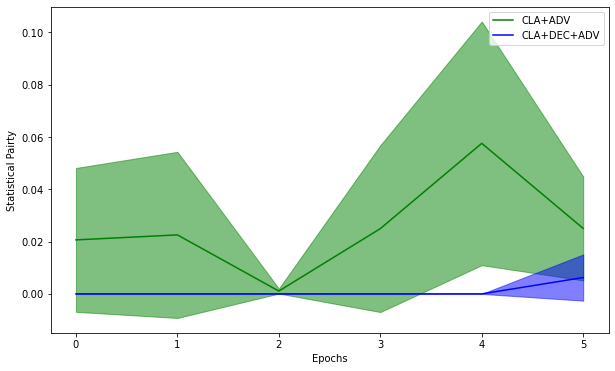

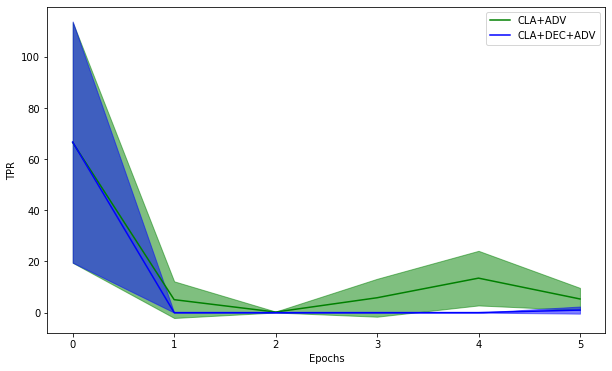

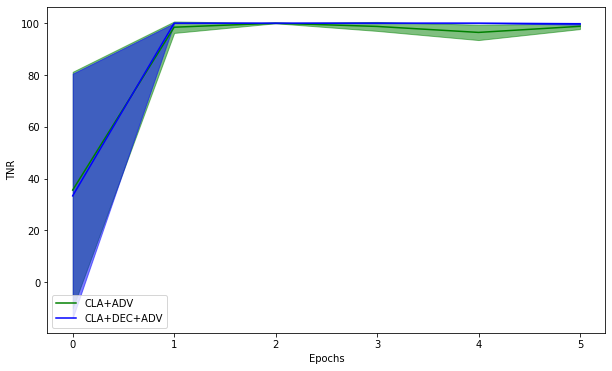

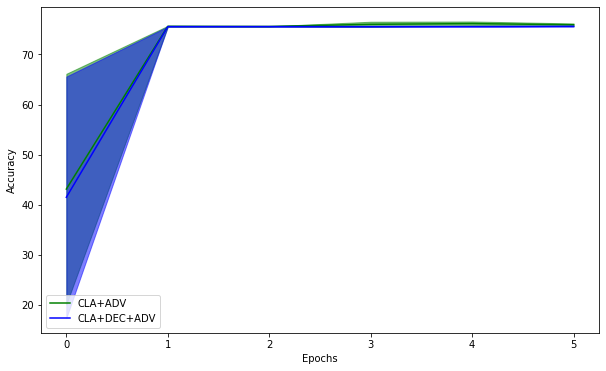

In [101]:
results_acc = [results_acc_cla_adv, results_acc_cla_adv_dec]
results_fair = [results_fair_cla_adv, results_fair_cla_adv_dec]
labels = ['CLA+ADV', 'CLA+DEC+ADV']

plot_results_multiple_runs(results_fair, 'Statistical Parity', epochs, labels, 'Statistical Pairty')
plot_results_multiple_runs(results_acc, 'Acc Pos', epochs, labels, 'TPR')
plot_results_multiple_runs(results_acc, 'Acc Neg', epochs, labels, 'TNR')
plot_results_multiple_runs(results_acc, 'Acc', epochs, labels, 'Accuracy')

## Compare Results Multiple Runs

In [112]:
experiments = ['FairGAN-cla-adv-EXP-1.1', 'FairGAN-cla-adv-EXP-1.2']
results_acc = dict()
results_fair = dict()
for exp in experiments:
    exps = []
    for run in range(5):
        path_exp= exp + "/" + str(run) 
        exps.append(path_exp)
    results_acc_temp, results_fair_temp = get_results_epochs(model_dir, CHANS, OUT, exps, val_set, dict_labels, max_epoch=MAX_EPOCH+1, step=STEP)
    results_acc[exp] = results_acc_temp
    results_fair[exp] = results_fair_temp

In [113]:
results_acc_avg = pd.DataFrame(columns = ['Model', 'Acc', 'Acc Pos', 'Acc Neg'])
results_fair_avg = pd.DataFrame(columns = ['Model', 'Statistical Parity'])

results_acc_std =  pd.DataFrame(columns = ['Model', 'Acc', 'Acc Pos', 'Acc Neg'])
results_fair_std = pd.DataFrame(columns = ['Model', 'Statistical Parity'])
epoch = 1

for exp in experiments:
    row_acc = [exp.strip('/'), round(np.mean(results_acc[exp][epoch]['Acc']),2), round(np.mean(results_acc[exp][epoch]['Acc Pos']),2), round(np.mean(results_acc[exp][epoch]['Acc Neg']),2)]
    results_acc_avg.loc[len(results_acc_avg.index)] = row_acc
    row_fair = [exp.strip('/'), np.mean(results_fair[exp][epoch]['Statistical Parity'])]
    results_fair_avg.loc[len(results_fair_avg.index)] = row_fair
    
    row_acc_std = [exp.strip('/'), round(np.std(results_acc[exp][epoch]['Acc']),2), round(np.std(results_acc[exp][epoch]['Acc Pos']),2), round(np.std(results_acc[exp][epoch]['Acc Neg']),2)]
    row_fair_std = [exp.strip('/'), np.std(results_fair[exp][epoch]['Statistical Parity'])]
    
    results_fair_std.loc[len(results_fair_std.index)] = row_fair_std
    results_acc_std.loc[len(results_acc_std.index)] = row_acc_std

In [114]:
df= pd.DataFrame(columns=["Model", "Statistical Parity", "Accuracy", "TPR", "TNR"])
df["Model"] = ["CLA+ADV", "CLA+ADV+DEC"]
df["Statistical Parity"] = round(results_fair_avg["Statistical Parity"],3).astype(str) + " (" + round(results_fair_std["Statistical Parity"],3).astype(str) + ")"
df["Accuracy"] = results_acc_avg["Acc"].astype(str) + " (" + round(results_acc_std["Acc"],2).astype(str) + ")"
df["TPR"] = results_acc_avg["Acc Pos"].astype(str) + " (" + round(results_acc_std["Acc Pos"],2).astype(str) + ")"
df["TNR"] = results_acc_avg["Acc Neg"].astype(str) + " (" + round(results_acc_std["Acc Neg"],2).astype(str) + ")"

In [115]:
df.head()

,Model,Statistical Parity,Accuracy,TPR,TNR
0,CLA+ADV,0.014 (0.027),75.61 (0.08),3.04 (6.08),99.06 (1.88)
1,CLA+ADV+DEC,0.0 (0.0),75.57 (0.01),0.0 (0.0),99.99 (0.02)


# Plot Logs

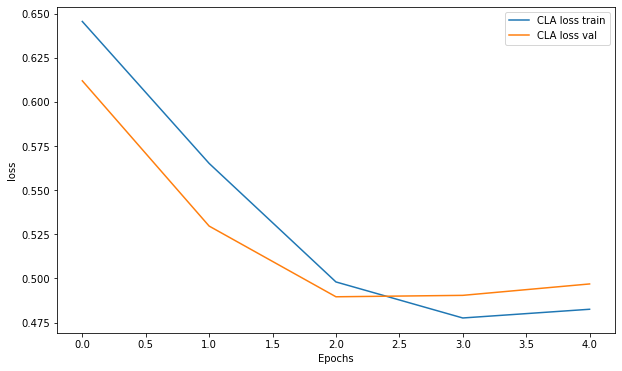

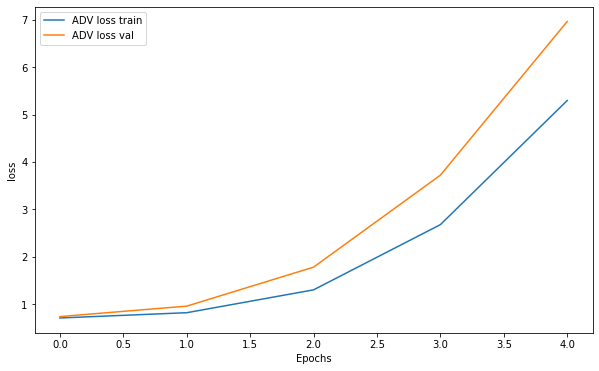

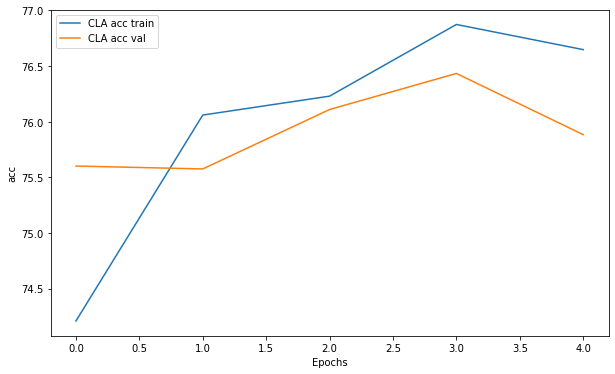

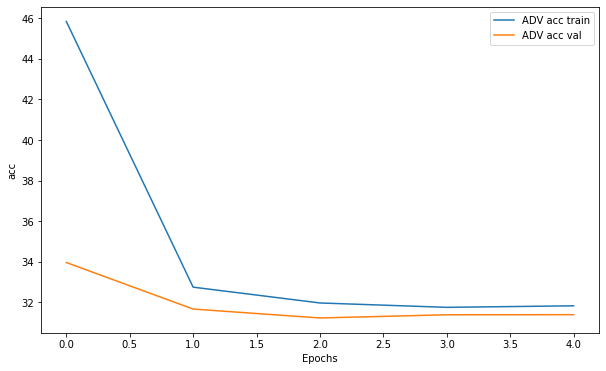

In [89]:
experiments = ['FairGAN-cla-adv-EXP-1.1/0', 'FairGAN-cla-adv-EXP-1.1/1', 'FairGAN-cla-adv-EXP-1.1/2', 'FairGAN-cla-adv-EXP-1.1/3', 'FairGAN-cla-adv-EXP-1.1/4']
plot_log_cla_adv(model_dir, experiments, 'CLA', 'loss')
plot_log_cla_adv(model_dir, experiments, 'ADV', 'loss')

plot_log_cla_adv(model_dir, experiments, 'CLA', 'acc')
plot_log_cla_adv(model_dir, experiments, 'ADV', 'acc')